## Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
df = pd.read_csv("mcdonalds.csv")

## Exploring Data

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
data = df.iloc[:, :11]
data.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
data.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(data)

var_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

names = ['PC' + str(i) for i in range(1, 12)]

pca_df = pd.DataFrame(pca_data, columns=names)
pca_comp = pd.DataFrame(pca.components_, columns=names, index=data.columns)

In [8]:
delimiter = "\n" + "="*100 + "\n"
print("Explained Variance Ratio of PCA components: ", pca.explained_variance_ratio_)
print(delimiter)
print("Cumulative Variance Explained by PCA components: ", var_cum)
print(delimiter)
print("PCA Components: ")
pca_comp

Explained Variance Ratio of PCA components:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


Cumulative Variance Explained by PCA components:  [29.94 49.22 62.52 70.83 76.78 81.81 86.19 90.14 93.82 97.06 99.99]


PCA Components: 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
healthy,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [9]:
print("PCA Standard Deviation: ", pca.explained_variance_**0.5)
print(delimiter)
print("Transformed data after PCA")
pca_df

PCA Standard Deviation:  [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


Transformed data after PCA


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [10]:
loadings = pca.components_
pc_list = ["PC"+str(idx) for idx in list(range(1, pca.n_features_in_+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = data.columns.values
loadings_df = loadings_df.set_index('feature')

<Axes: >

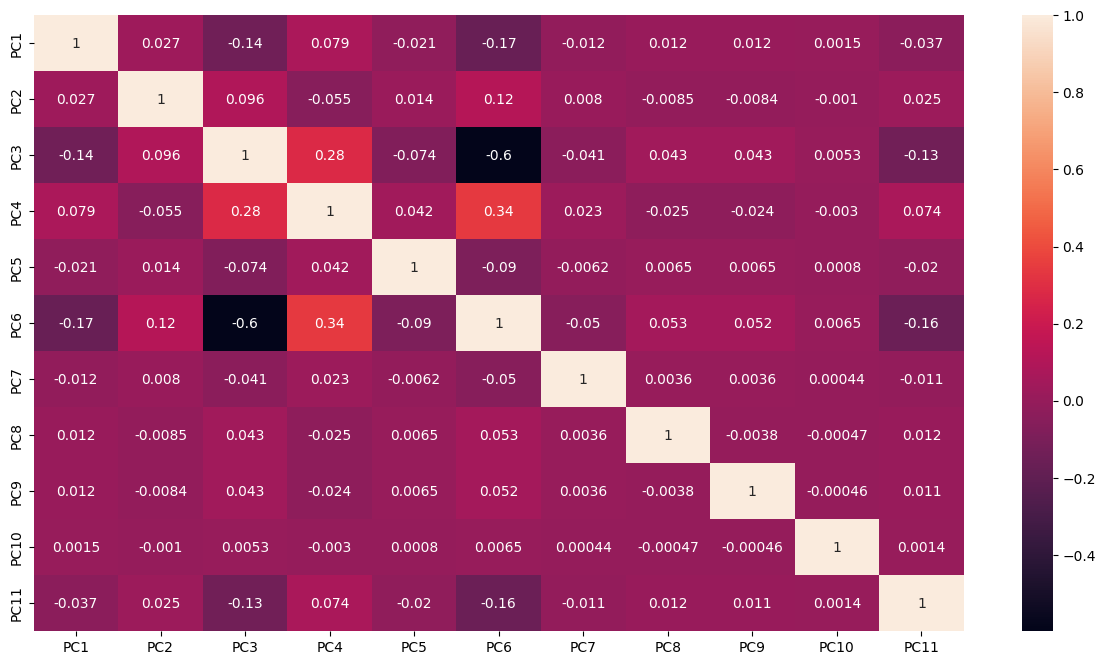

In [12]:
plt.figure(figsize=(15, 8))
sb.heatmap(loadings_df.corr(), annot = True)

In [16]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 736.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59055 sha256=ddc3e4eeeda01e5d38c1e9d5c11bfe30c152f600adce85af7c5cf0e559b4cd1e
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


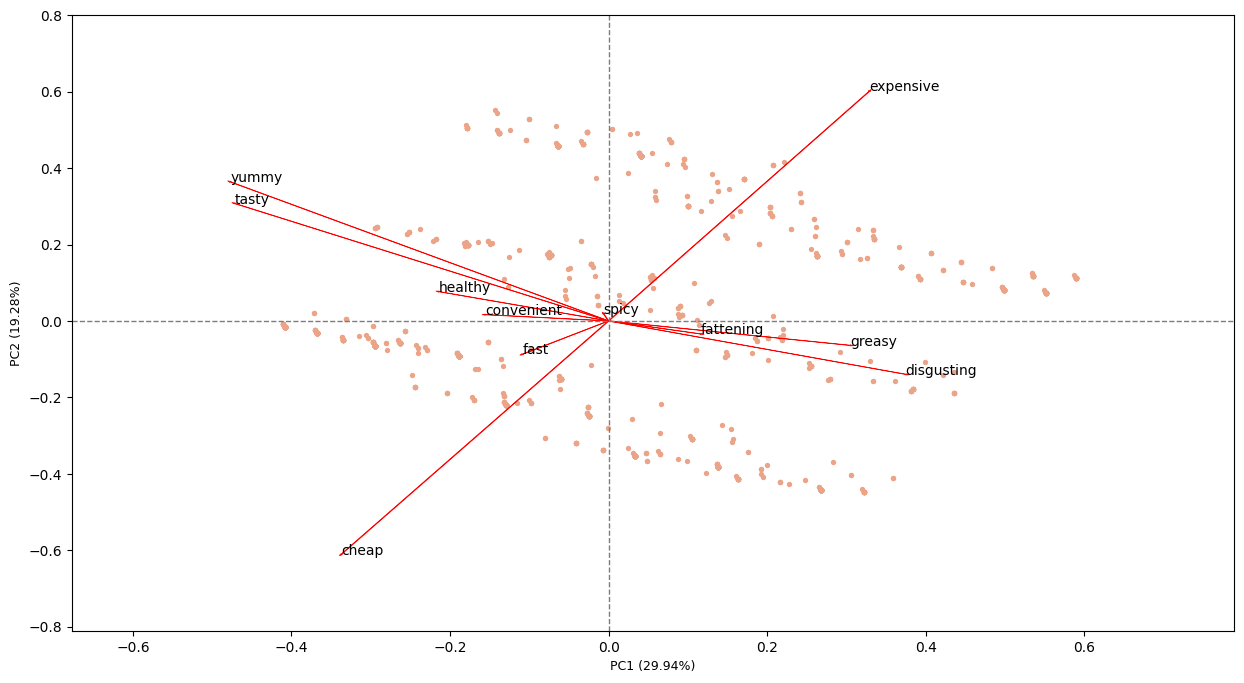

In [17]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=pca_data, loadings=pca.components_, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               dotsize = 8, var2=round(pca.explained_variance_ratio_[1]*100, 2),
               arrowcolor="red",
               show=True,dim=(15,8))

##Using k-Means

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
k_vals = range(2, 8)
inertias = []
silhoutte_scores = []

for k_val in k_vals:
    kmeans = KMeans(n_clusters=k_val, n_init="auto")
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

    slht_score = silhouette_score(data, kmeans.labels_)
    silhoutte_scores.append(slht_score)

Text(0.5, 1.0, 'Elbow Method and Silhouette Score')

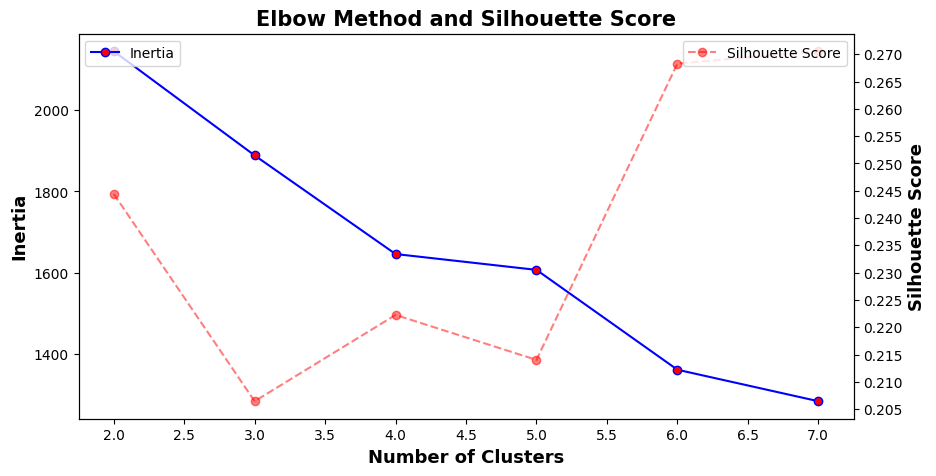

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax1 = ax.twinx()

ax.plot(k_vals, inertias, marker="o", color="blue", label="Inertia", linestyle="-", alpha=1, markerfacecolor="red")
ax1.plot(k_vals, silhoutte_scores, marker="o", color="red", label="Silhouette Score", linestyle="--", alpha=0.5)

ax.set_xlabel("Number of Clusters", fontsize=13, fontweight="bold")
ax.set_ylabel("Inertia", fontsize=13, fontweight="bold")
ax1.set_ylabel("Silhouette Score", fontsize=13, fontweight="bold")

ax.legend(loc="upper left", fontsize=10)
ax1.legend(loc="upper right", fontsize=10)

ax1.tick_params(axis="y", labelsize=10)

plt.locator_params(axis="both", nbins = 20)
plt.title("Elbow Method and Silhouette Score", fontsize=15, fontweight="bold")

In [21]:
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(data)

df_clustered = data.copy()
df_clustered["Cluster"] = kmeans.labels_

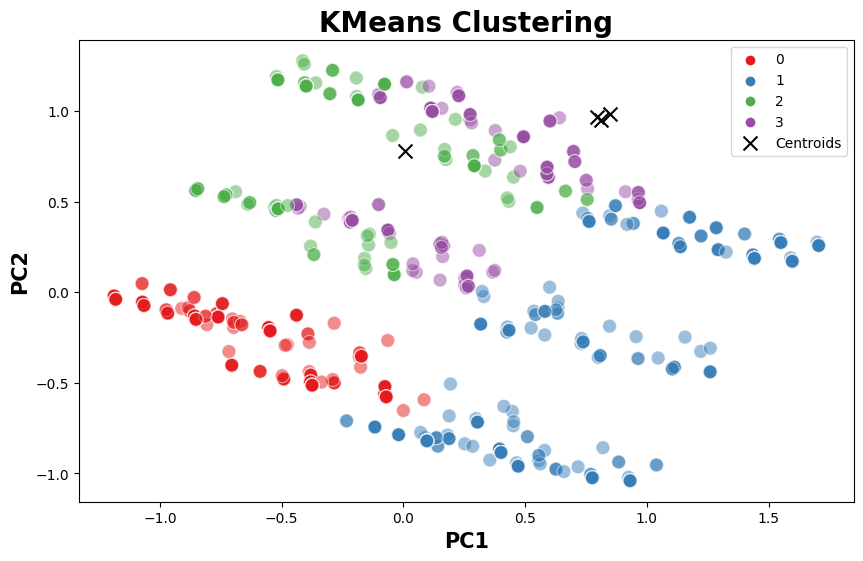

In [22]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x = pca_df["PC1"], y = pca_df["PC2"], hue = df_clustered["Cluster"], palette = "Set1", s = 100, alpha = 0.5)

plt.xlabel("PC1", fontsize = 15, fontweight = "bold")
plt.ylabel("PC2", fontsize = 15, fontweight = "bold")
plt.title("KMeans Clustering", fontsize = 20, fontweight = "bold")

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = "black", s = 100, alpha = 1, marker="x", label = "Centroids")
plt.legend(loc = "best", fontsize = 10)

##Profiling Segments

In [23]:
segment_profiles = []
cluster_labels = kmeans.labels_

for cluster in range(4):  # Change to the actual number of clusters
    segment_data = data[cluster_labels == cluster]
    segment_profile = np.mean(segment_data, axis=0)  # You can also use np.median
    segment_profiles.append(segment_profile)

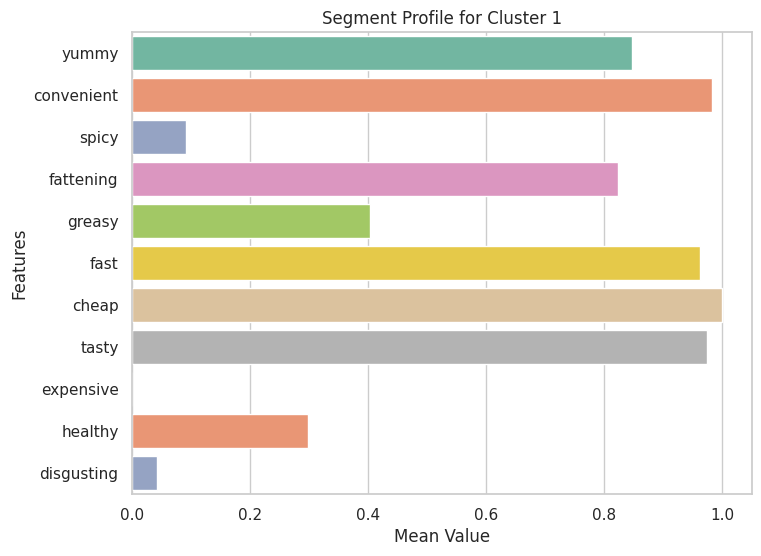

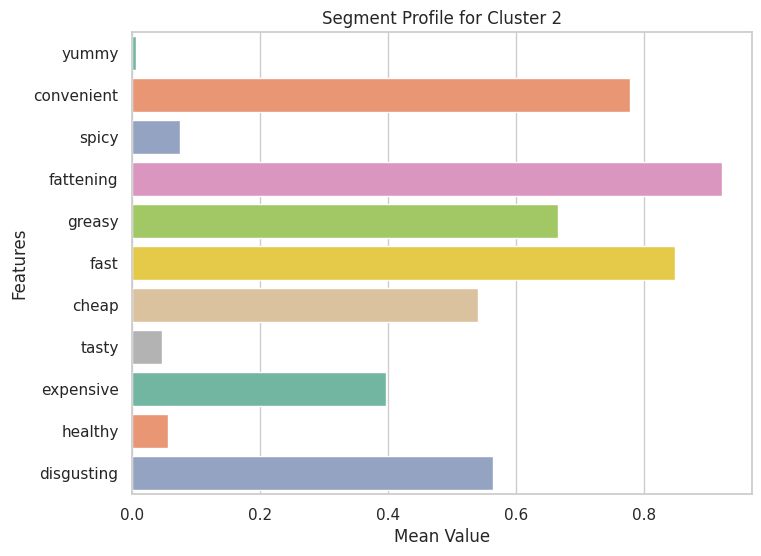

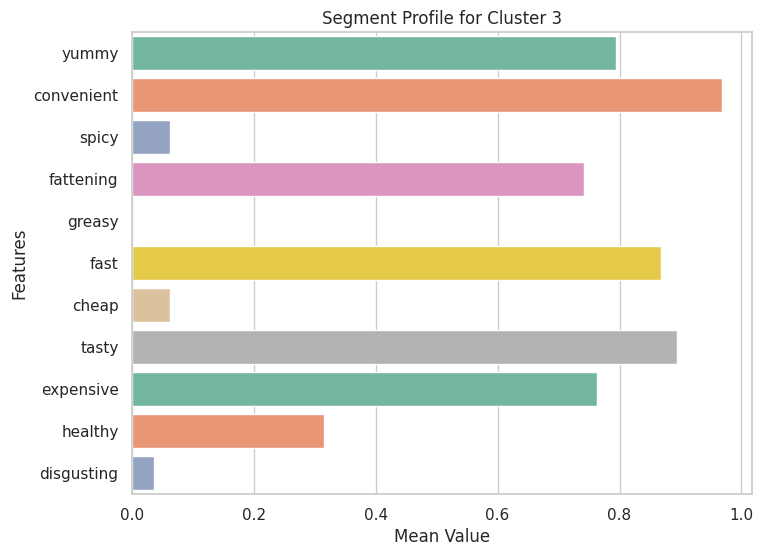

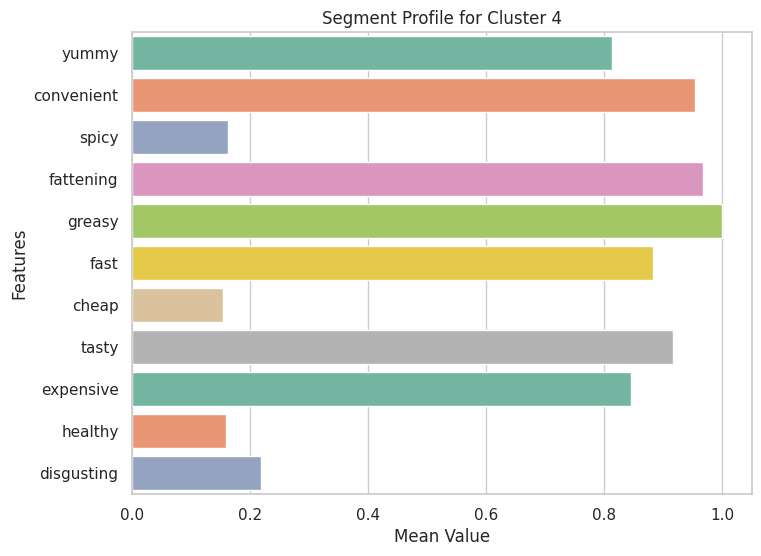

In [24]:
feature_names = data.columns.tolist()

segment_df = pd.DataFrame(segment_profiles, columns=feature_names)

sb.set(style="whitegrid")
for cluster in range(4):
    plt.figure(figsize=(8, 6))
    sb.barplot(data=segment_df.loc[[cluster]], orient='h', palette='Set2')
    plt.ylabel('Features')
    plt.xlabel('Mean Value')
    plt.title(f'Segment Profile for Cluster {cluster + 1}')
    plt.show()

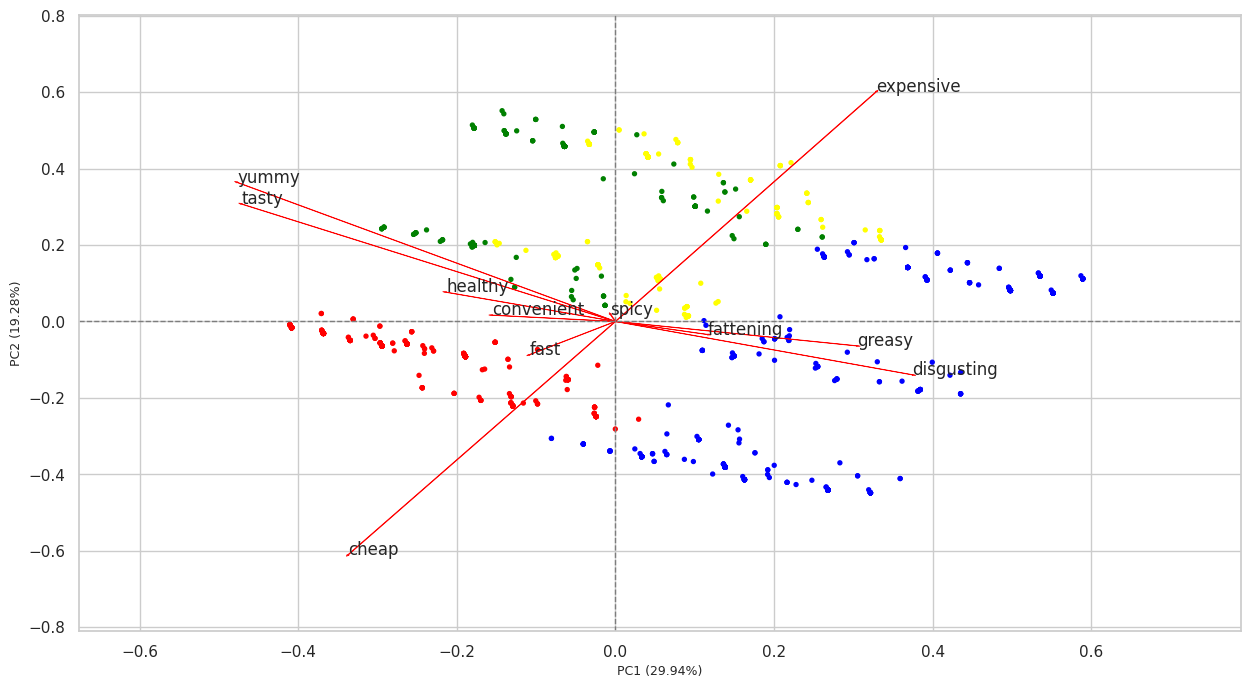

In [26]:
from bioinfokit.visuz import cluster

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data)
pca_components = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_components["Cluster_num"] = kmeans.labels_
colors = pca_components["Cluster_num"].map({0: "red", 1: "blue", 2: "green", 3: "yellow"}).values

cluster.biplot(cscore=pca_data, loadings=pca.components_, labels=data.columns.values,
               colordot = colors,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               dotsize = 8, var2=round(pca.explained_variance_ratio_[1]*100, 2),
               arrowcolor="red",
               show=True,dim=(15,8))

##Describing Segments

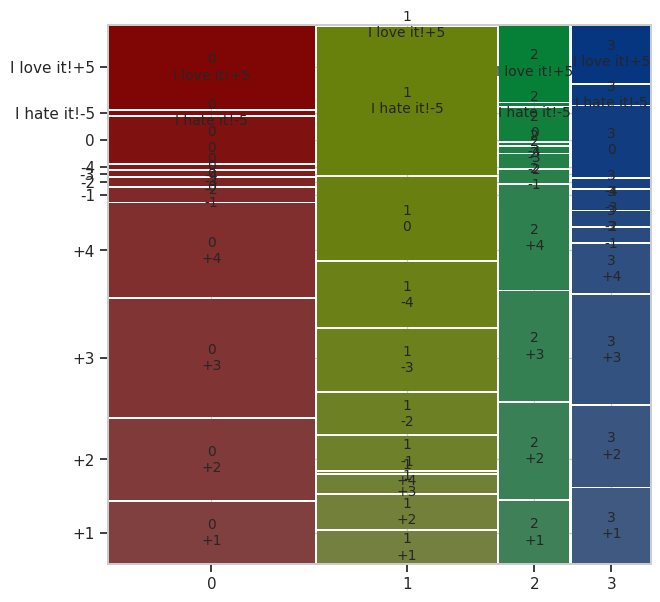

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,67,87,127,101,15,9,5,5,50,4,91
1,31,32,17,1,32,39,58,61,78,139,0
2,23,35,40,38,5,5,2,1,12,1,28
3,31,33,45,20,6,6,8,4,29,8,24


None

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
data_mosaic = df.copy()
data_mosaic['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(data_mosaic['cluster_num'], data_mosaic['Like'])

plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

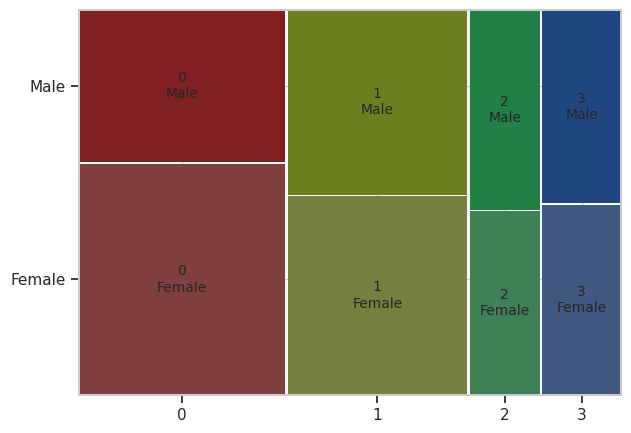

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,67,87,127,101,15,9,5,5,50,4,91
1,31,32,17,1,32,39,58,61,78,139,0
2,23,35,40,38,5,5,2,1,12,1,28
3,31,33,45,20,6,6,8,4,29,8,24


None

In [30]:
crosstab_gender = pd.crosstab(data_mosaic['cluster_num'],data_mosaic['Gender'])
crosstab_gender

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

Text(0.5, 1.0, "Box plot for 'Age'")

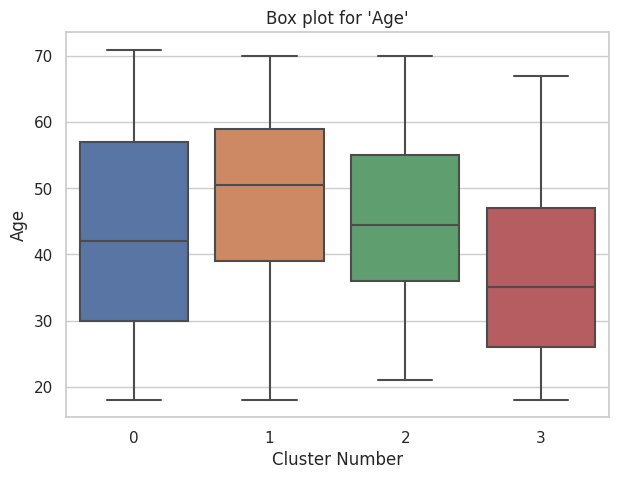

In [31]:
sb.boxplot(x="cluster_num", y="Age", data=data_mosaic);
plt.xlabel("Cluster Number")
plt.title("Box plot for 'Age'")

##Selecting target segments

In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [34]:
target_segment_data = df.copy()
target_segment_data["Cluster_num"] = kmeans.labels_

In [39]:
target_segment_data["Like"] = encoder.fit_transform(target_segment_data[["Like"]])
target_segment_data["VisitFrequency"] = encoder.fit_transform(target_segment_data[["VisitFrequency"]])
gender_data = target_segment_data.groupby("Cluster_num")["Gender"].value_counts().sort_index().unstack()

Text(0.5, 1.0, 'Target Segment')

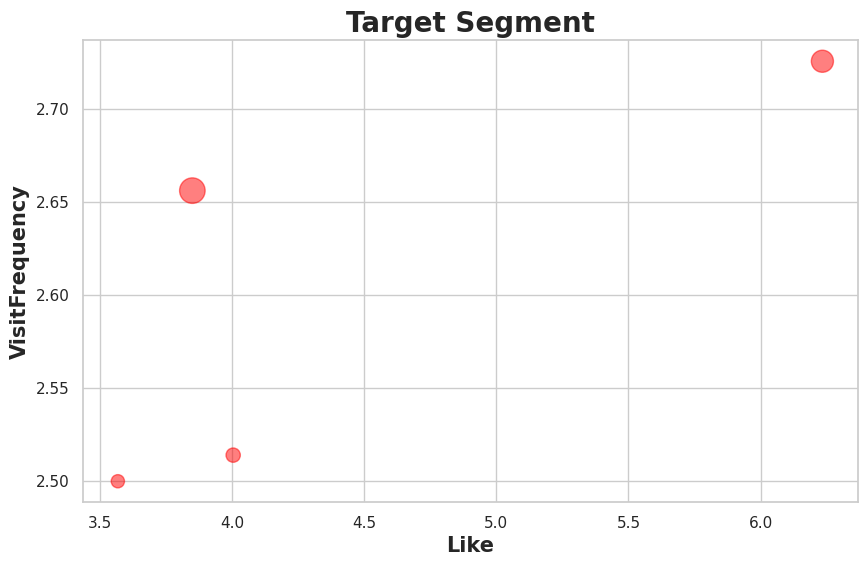

In [40]:
x_pts = target_segment_data.groupby("Cluster_num")["Like"].mean()
y_pts = target_segment_data.groupby("Cluster_num")["VisitFrequency"].mean()

plt.figure(figsize=(10, 6))
sizes = gender_data["Female"]
plt.scatter(x_pts, y_pts, s=sizes, c="red", alpha=0.5)
plt.xlabel("Like", fontsize=15, fontweight="bold")
plt.ylabel("VisitFrequency", fontsize=15, fontweight="bold")
plt.title("Target Segment", fontsize=20, fontweight="bold")